In [ ]:
from processor.processor import DataModule
data_module = DataModule()
train_loader = data_module.train_dataloader()

In [2]:
X, y = next(iter(train_loader))
X.shape, y.shape, len(data_module.dataset)

(torch.Size([32, 1, 224, 224]), torch.Size([32, 3, 224, 224]), 7129)

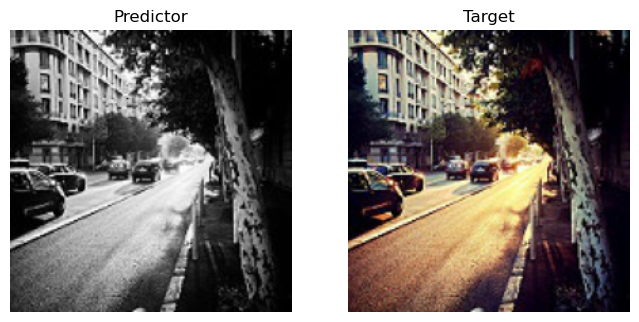

In [3]:
data_module.plot_sample(12)

In [4]:
# from model.model import UNet

# autoencoder = UNet(in_channels=1, out_channels=3)
# y_hat = autoencoder(X)

In [5]:
# y_hat.shape

In [6]:
# import matplotlib.pyplot as plt

# plt.imshow(y_hat[0].permute((1,2,0)).detach().numpy())
# plt.show()

In [7]:
import pytorch_lightning as L
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ProgressBar
from model.train_wrapper import AutoEncoder

model = AutoEncoder()
num_epochs = 100
trainer = Trainer(max_epochs=num_epochs, fast_dev_run=False)
trainer.fit(model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type    | Params
--------------------------------------
0 | model     | UNet    | 1.9 M 
1 | criterion | MSELoss | 0     
--------------------------------------
1.9 M     Trainable params
0         Non-trainable params
1.9 M     Total params
7.763     Total estimated model params size (MB)
2023-12-10 01:32:47.487528: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly di

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/home/kamil/miniconda3/envs/data-science/lib/python3.9/site-packages/pytorch_lightning/trainer/call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [8]:
trainer.test(model) 

You are using a CUDA device ('NVIDIA GeForce RTX 3050 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

[{}]